In [1]:
import openai.types.embedding
import pandas as pd
import re
import numpy as np
import json
from uuid import uuid4
import pickle
import requests
from openai import OpenAI
from env import OPENAI_API_KEY

def save_pickle(filename, data):
    # Open a file for writing. The 'wb' argument opens the file in binary write mode.
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

def load_pickle(filename):
    # Open the file in binary read mode
    with open(filename, 'rb') as file:
        loaded_data = pickle.load(file)
        return loaded_data

In [33]:
dirty_data = pd.read_csv('unprocessed_data.csv')
# data

In [84]:
clean_data = pd.DataFrame()

def reformat_options(option):
    split_options = option.split('\n')
    indices_removed = [split_options[i][3:] for i in range(len(split_options))]
    return indices_removed

clean_data['id'] = dirty_data['questions'].map(lambda q: uuid4())
clean_data['question'] = dirty_data['questions'].map(lambda text: re.sub(' +', ' ', text.replace('\n', ' ')))
clean_data['options'] = dirty_data['options'].apply(reformat_options)
clean_data['_category'] = dirty_data['_notes'].map(lambda text: text.strip())

save_pickle('data.pkl', clean_data)
clean_data

,id,question,options,_category
0,b8645f24-32b3-4732-b0ee-99db249bcd79,Sumita Khatri wrote a research report and foll...,"[No., Yes, relating to performance presentatio...",Ethical and Professional Standards
1,d9565025-0798-4477-aaad-b9effb0fc974,"Aryana Reid, CFA, is a private wealth manager....",[Publish the post and send it as a mail to the...,Ethical and Professional Standards
2,dcafd902-0a03-4617-bfad-42f6f4fa0513,Kent Miller is an investment adviser at UBN In...,"[determine Hartford’s needs, objectives, and t...",Ethical and Professional Standards
3,da4cd658-bca1-4935-b9c3-98d65030e818,"Justin Zoghlin, CFA, was hired as a wealth man...","[Serving the religious community., Managing no...",Ethical and Professional Standards
4,b854842f-4701-4c1d-9613-a6e919617f57,"Rani Kaporwala, CFA, an analyst at Smart Secur...","[No., Yes, relating to communications with cli...",Ethical and Professional Standards
5,706ec10f-fd3a-451a-82b6-baaf7bf85f3d,Cara Knightly is a much respected portfolio ma...,"[Yes, related to priority of transactions., Ye...",Ethical and Professional Standards
6,d1370f15-cc00-4184-a548-eff352633bc7,"Andy McCarthy, CFA, resigns from his position ...","[No., Yes, relating to reference to the CFA In...",Ethical and Professional Standards
7,ecba238f-40ac-44fe-8083-cd2b3a2dadcd,"During lunch with his friend, who is an analys...","[Yes, with respect to diligence and reasonable...",Ethical and Professional Standards
8,3ba54509-0511-4d10-9364-cb04fb3a04e6,Which of the following is least likely correct...,[Financial analysts may use conclusions as rec...,Ethical and Professional Standards
9,ca289b3f-1c34-4274-baaa-fe708fb9576c,Stewart is an analyst at a small investment fi...,"[Yes, relating to priority of transactions., N...",Ethical and Professional Standards


In [2]:
data = load_pickle('data.pkl')
client = OpenAI(api_key=OPENAI_API_KEY)

def get_embedding_from_openai(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

def embed_question(row):
    combined_string = row['question'] + ' ' + json.dumps(row['options'])
    return get_embedding_from_openai(combined_string)

data['embedding'] = data.apply(embed_question, axis=1)
# res = data[0: 1].apply(embed_question, axis=1)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-hR3YP***************************************L6BR. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [111]:
data

,id,question,options,_category,embedding
0,b8645f24-32b3-4732-b0ee-99db249bcd79,Sumita Khatri wrote a research report and foll...,"[No., Yes, relating to performance presentatio...",Ethical and Professional Standards,"[0.007968312129378319, -0.0021401941776275635,..."
1,d9565025-0798-4477-aaad-b9effb0fc974,"Aryana Reid, CFA, is a private wealth manager....",[Publish the post and send it as a mail to the...,Ethical and Professional Standards,"[-0.02464733086526394, -0.014164824038743973, ..."
2,dcafd902-0a03-4617-bfad-42f6f4fa0513,Kent Miller is an investment adviser at UBN In...,"[determine Hartford’s needs, objectives, and t...",Ethical and Professional Standards,"[-0.0013949209824204445, -0.01329685840755701,..."
3,da4cd658-bca1-4935-b9c3-98d65030e818,"Justin Zoghlin, CFA, was hired as a wealth man...","[Serving the religious community., Managing no...",Ethical and Professional Standards,"[-0.01206973847001791, -0.030683474615216255, ..."
4,b854842f-4701-4c1d-9613-a6e919617f57,"Rani Kaporwala, CFA, an analyst at Smart Secur...","[No., Yes, relating to communications with cli...",Ethical and Professional Standards,"[0.016661042347550392, -0.013284368440508842, ..."
5,706ec10f-fd3a-451a-82b6-baaf7bf85f3d,Cara Knightly is a much respected portfolio ma...,"[Yes, related to priority of transactions., Ye...",Ethical and Professional Standards,"[0.0029430605936795473, -0.018401801586151123,..."
6,d1370f15-cc00-4184-a548-eff352633bc7,"Andy McCarthy, CFA, resigns from his position ...","[No., Yes, relating to reference to the CFA In...",Ethical and Professional Standards,"[-0.0012830019695684314, -0.023840297013521194..."
7,ecba238f-40ac-44fe-8083-cd2b3a2dadcd,"During lunch with his friend, who is an analys...","[Yes, with respect to diligence and reasonable...",Ethical and Professional Standards,"[-0.0013840276515111327, -0.022090759128332138..."
8,3ba54509-0511-4d10-9364-cb04fb3a04e6,Which of the following is least likely correct...,[Financial analysts may use conclusions as rec...,Ethical and Professional Standards,"[-0.006813789717853069, 0.005216542165726423, ..."
9,ca289b3f-1c34-4274-baaa-fe708fb9576c,Stewart is an analyst at a small investment fi...,"[Yes, relating to priority of transactions., N...",Ethical and Professional Standards,"[0.002191121457144618, -0.010495488531887531, ..."


In [118]:
data['embedding'][0][0]

0.007968312129378319

In [126]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Convert to a list of lists of floats
matrix = np.array(data['embedding'].apply(json.dumps).apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(34, 2)

Text(0.5, 1.0, 'Questions visualised in language using t-SNE')

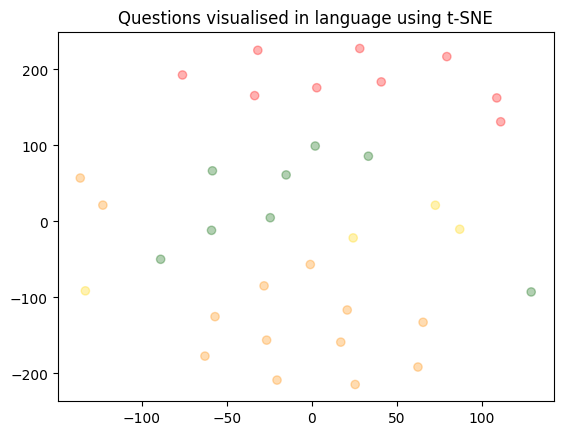

In [143]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
data['Score'] = numbers
color_indices = data.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
plt.title("Amazon ratings visualized in language using t-SNE")

plt.title("Questions visualised in language using t-SNE")

In [135]:
# Step 1: Identify unique strings and sort them for consistent mapping
unique_strings = sorted(set(data['_category']))

# Step 2: Create a mapping from string to number
string_to_number = {string: i for i, string in enumerate(unique_strings)}

# Step 3: Replace each string in your list with its corresponding number
numbers = [string_to_number[string] for string in data['_category']]

In [144]:
data

,id,question,options,_category,embedding,Score
0,b8645f24-32b3-4732-b0ee-99db249bcd79,Sumita Khatri wrote a research report and foll...,"[No., Yes, relating to performance presentatio...",Ethical and Professional Standards,"[0.007968312129378319, -0.0021401941776275635,...",1
1,d9565025-0798-4477-aaad-b9effb0fc974,"Aryana Reid, CFA, is a private wealth manager....",[Publish the post and send it as a mail to the...,Ethical and Professional Standards,"[-0.02464733086526394, -0.014164824038743973, ...",1
2,dcafd902-0a03-4617-bfad-42f6f4fa0513,Kent Miller is an investment adviser at UBN In...,"[determine Hartford’s needs, objectives, and t...",Ethical and Professional Standards,"[-0.0013949209824204445, -0.01329685840755701,...",1
3,da4cd658-bca1-4935-b9c3-98d65030e818,"Justin Zoghlin, CFA, was hired as a wealth man...","[Serving the religious community., Managing no...",Ethical and Professional Standards,"[-0.01206973847001791, -0.030683474615216255, ...",1
4,b854842f-4701-4c1d-9613-a6e919617f57,"Rani Kaporwala, CFA, an analyst at Smart Secur...","[No., Yes, relating to communications with cli...",Ethical and Professional Standards,"[0.016661042347550392, -0.013284368440508842, ...",1
5,706ec10f-fd3a-451a-82b6-baaf7bf85f3d,Cara Knightly is a much respected portfolio ma...,"[Yes, related to priority of transactions., Ye...",Ethical and Professional Standards,"[0.0029430605936795473, -0.018401801586151123,...",1
6,d1370f15-cc00-4184-a548-eff352633bc7,"Andy McCarthy, CFA, resigns from his position ...","[No., Yes, relating to reference to the CFA In...",Ethical and Professional Standards,"[-0.0012830019695684314, -0.023840297013521194...",1
7,ecba238f-40ac-44fe-8083-cd2b3a2dadcd,"During lunch with his friend, who is an analys...","[Yes, with respect to diligence and reasonable...",Ethical and Professional Standards,"[-0.0013840276515111327, -0.022090759128332138...",1
8,3ba54509-0511-4d10-9364-cb04fb3a04e6,Which of the following is least likely correct...,[Financial analysts may use conclusions as rec...,Ethical and Professional Standards,"[-0.006813789717853069, 0.005216542165726423, ...",1
9,ca289b3f-1c34-4274-baaa-fe708fb9576c,Stewart is an analyst at a small investment fi...,"[Yes, relating to priority of transactions., N...",Ethical and Professional Standards,"[0.002191121457144618, -0.010495488531887531, ...",1


In [145]:
load_pickle('data.pkl')

,id,question,options,_category,embedding
0,b8645f24-32b3-4732-b0ee-99db249bcd79,Sumita Khatri wrote a research report and foll...,"[No., Yes, relating to performance presentatio...",Ethical and Professional Standards,"[0.007968312129378319, -0.0021401941776275635,..."
1,d9565025-0798-4477-aaad-b9effb0fc974,"Aryana Reid, CFA, is a private wealth manager....",[Publish the post and send it as a mail to the...,Ethical and Professional Standards,"[-0.02464733086526394, -0.014164824038743973, ..."
2,dcafd902-0a03-4617-bfad-42f6f4fa0513,Kent Miller is an investment adviser at UBN In...,"[determine Hartford’s needs, objectives, and t...",Ethical and Professional Standards,"[-0.0013949209824204445, -0.01329685840755701,..."
3,da4cd658-bca1-4935-b9c3-98d65030e818,"Justin Zoghlin, CFA, was hired as a wealth man...","[Serving the religious community., Managing no...",Ethical and Professional Standards,"[-0.01206973847001791, -0.030683474615216255, ..."
4,b854842f-4701-4c1d-9613-a6e919617f57,"Rani Kaporwala, CFA, an analyst at Smart Secur...","[No., Yes, relating to communications with cli...",Ethical and Professional Standards,"[0.016661042347550392, -0.013284368440508842, ..."
5,706ec10f-fd3a-451a-82b6-baaf7bf85f3d,Cara Knightly is a much respected portfolio ma...,"[Yes, related to priority of transactions., Ye...",Ethical and Professional Standards,"[0.0029430605936795473, -0.018401801586151123,..."
6,d1370f15-cc00-4184-a548-eff352633bc7,"Andy McCarthy, CFA, resigns from his position ...","[No., Yes, relating to reference to the CFA In...",Ethical and Professional Standards,"[-0.0012830019695684314, -0.023840297013521194..."
7,ecba238f-40ac-44fe-8083-cd2b3a2dadcd,"During lunch with his friend, who is an analys...","[Yes, with respect to diligence and reasonable...",Ethical and Professional Standards,"[-0.0013840276515111327, -0.022090759128332138..."
8,3ba54509-0511-4d10-9364-cb04fb3a04e6,Which of the following is least likely correct...,[Financial analysts may use conclusions as rec...,Ethical and Professional Standards,"[-0.006813789717853069, 0.005216542165726423, ..."
9,ca289b3f-1c34-4274-baaa-fe708fb9576c,Stewart is an analyst at a small investment fi...,"[Yes, relating to priority of transactions., N...",Ethical and Professional Standards,"[0.002191121457144618, -0.010495488531887531, ..."
